# Analysis of the Palmer Penguins Data Set
***

Author: Irene Kilgannon

This notebook contains my analysis of the palmer penguins data set. The palmer penguins data set contains data measurements for three different penguin species, the Chinstrap, Gentoo and Adélie penguin. The data was collected between 2007 - 2009 by Dr. Kristen Gorman with the [Palmer Station Long Term Ecological Research Program](https://lternet.edu/site/palmer-antarctica-lter/) on three islands in the Palmer Archipelago, Antarctica. The Palmer archipelago is named after [Nathaniel Palmer](https://en.wikipedia.org/wiki/Nathaniel_Palmer), an American explorer who explored this part of the Antartica in 1820.

![The Palmer Penguins. Artwork by @allison_horst](https://sebastiancallh.github.io/ox-hugo/palmer-penguins.png)

_The Palmer Penguins, artwork by @allison_horst_






According to [AllisonHorst.github.io](https://github.com/allisonhorst/palmerpenguins/blob/main/README.md) "the goal of the palmerpenguins is to provide a great dataset for data exploration and visualization, as an alternative to iris". In this [article](https://www.researchgate.net/profile/Kristen-B-Gorman/publication/362573623_Palmer_Archipelago_Penguins_Data_in_the_palmerpenguins_R_Package_-_An_Alternative_to_Anderson's_Irises/links/63100bec1ddd44702125ddbc/Palmer-Archipelago-Penguins-Data-in-the-palmerpenguins-R-Package-An-Alternative-to-Andersons-Irises.pdf) Horst et al. discuss the merits of using their palmer penguins data set over Fisher's iris data set. One of the key points they make is that the palmer penguins data set is a more realistic data set with missing values. The iris data set has no missing values so students using the iris data set are unfortunately not learning one of the key skills in data analysis - cleaning and preprocessing data.

This data set is used by students and educators so students can learn how to:
* clean and preprocess data
* perform exploratory data analysis
* visualise data
* perform comparative analysis and clustering of data
* machine learning by [classification](https://medium.com/@cleonard_85587/classification-penguins-species-on-python-b494fd92e686) and regression. 

A number of different programming languages are widely used to analyse the data. These are [python](https://www.youtube.com/watch?v=uiYgZomY-v4&t=2970s), [R](https://www.youtube.com/watch?v=KxfC_gzTBVg) and [Julia](https://www.youtube.com/watch?v=lflrmExE3gY&t=0s). I have also found some visualisation of the data set using [tableau](https://public.tableau.com/app/profile/kushie/viz/MOMWeek28-ThePalmerPenguins/PalmerPenguins). Tableau is not a programming language but is a data visualisation tool that does not involve any coding. This project will be written in python. 

## The Tasks

### Import Modules
***

Four modules are required for this analysis:
* pandas - for manipulating data and for performing data analysis
* numpy - performs a wide variety of mathematical calculations on arrays
* matplotlib.pyplot - to create plots
* seaborn - to create plots

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import matplotlib.pylab
import matplotlib.pylab as plt

# Import seaborn
import seaborn as sns

In [2]:
# To ignore a warning regarding a change in the figure layout of the seaborn plot.
# c:\Users\Irene\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight self._figure.tight_layout(*args, **kwargs)
import warnings
warnings.filterwarnings('ignore')

### Import the data set
***

The data set was imported as a csv file from [Seaborn Data](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). The original raw data set is available on Alison Horst's [GitHub](https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins_raw.csv).

The data set from seaborn has been processed to remove extraneous information such as any clutch size, blood isotope ratios and other additional information that is not required for this analysis.

In [3]:
# Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [4]:
# Have a look. Check that the file has loaded correctly.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Overview of the data set and the variables it contains.
***

In [5]:
# df.head() prints out the first five rows of the csv file.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
# Counts the number of rows and columms in the data set.
df.shape

(344, 7)

In [7]:
# df.info() gives concise information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
# A count of the number of missing variables.
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
# Unique names in the species column.
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [10]:
# Unique values in the island column.
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
# Unique names in the sex column.
df["sex"].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

For consistancy I would like the formatting of the sex column to be in line with the formatting of the species and island columns i.e title case.

In [12]:
# Changing the format of the sex column.
df['sex'] = df['sex'].str.title()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


__Summary Statistics for the Palmer penguins data set__

In [13]:
# Describe the data set. Summary statistics about the data file. 
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Overview of the data set and the variables within it.**

The data set has 344 rows and seven columns. Each row is an individual penguin and for each penguin there are seven possible variables.

The seven variables in the dataset are:
* species
* island
* bill length in mm
* bill depth in mm
* flipper length in mm
* the body mass in g
* the sex of the penguin.

Three penguin species were studied - the Adélie, Chinstrap and Gentoo penguin. They were found on three islands in the Palmer Archipelago, Antarctica - Dream Island, Torgerson Island and Biscoe Point, which are referred to as Dream, Torgerson and Biscoe in the data set.


<center><img src="islands.png" alt="image" style = "width:600px; height=auto"></center>


_Image credit Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081_


This artwork by Allison Horst nicely depicts the difference between the bill length and bill depth and how they were measured. Please note that in the original data set the word culmen was used in place of bill. 


![Bill length and bill depth](https://miro.medium.com/v2/resize:fit:640/format:webp/1*WSb-Y9xb3YSx9owW7_JuMw.png)

_Penguin Bills, artwork by @allison_horst_


[Gorman et al](https://doi.org/10.1371/journal.pone.0090081) states that the bill length and bill depth were measured in mm to an accuracy of 0.1mm using a dial calipers while flipper length was measured in mm using a ruler to an accuracy of 1mm. The body mass of the penguins was measured in grams. The sex of the penguins was determined by molecular analysis of a blood sample from the penguin. 

There are no variables missing from two columns, the species and island columns. The other columns have some missing data. The sex column has the most missing values with 11 instances of missing data. Bill length, bill depth, flipper length and body mass all have two pieces of missing data each.

### Data types in the data set.

There are two main types of data:
- numerical (quantitative) data: 
- categorical (qualitative) data

These data types can then be further divided as shown in the table below.

|Type|Category|Description|Example|
|---|---|---|---|
|Quantitative (numerical)|Discrete |Discrete values that can be counted.|Number of people who drive an electric car.|
||Continuous|Values have a range that can be measured on a scale or continuum.|Height measurements of a group of people.|
|Qualitative (categorical)|Nominal|Can be divided into groups with no natural order or hierarchy.|Nationalities.|
||Ordinal|Can be divided into groups but there is a natural order or hierarchy.|Star ratings of hotels, 1-star to 5-star.|
||Binary|Only two options.|An exam with a pass or fail mark|


When a data set is loaded pandas automatically assigns what it thinks is the best data type for the data. Numerical data are categorised as integers or floats. Columns with missing data, NaN (not a number) are automatically given the float64 data type. Non-numerical data are automatically assigned as objects, which is equivalent to strings in python. 


Pandas data type names have a slightly different name compared to their python data types name, as shown in the table below.

| Python Type| Pandas dtype|Description|
|--------|--------|---|
|str (string)| object|Text|
|float|float64|A number with a decimal point|
|int (integer)|int64|A whole number|
|bool|bool|True/False Values|
| - |category|Discrete, limited text values|
|-|datetime64|Time and date values|

In [14]:
# Check the data type of the variables.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

__Data types__

Bill length, bill depth, flipper length and body mass are all quantitative, continuous data and they were given the data type, float64 by pandas. 

Bill length and bill depth were measured in mm with the result recorded to one decimal place. These are floating point numbers and pandas has correctly assigned them to the data type of float64.

After reviewing the raw data file I noticed that while flipper length and body mass were measured in mm, they were not measured to the same degree of accuracy as the bill measurements and were recorded as whole numbers i.e. integers. The correct data type for these two columns should be int64.

Species, island and sex are all are categorical data with no natural order and were assigned the object data type by pandas.

After completing the data camp course, [working with categorical data](https://app.datacamp.com/learn/courses/working-with-categorical-data-in-python) I realised if a column contains a limited and fixed number of non-numerical values it should, if possible be assigned to the pandas data type of [category](https://pandas.pydata.org/docs/user_guide/categorical.html). There is no corresponding data type in python. For large data sets changing the data type to category could potentially result in significant memory savings.

Species, island and sex are categorical, nominal data and should be assigned to the pandas data type of category. As they all have limited, fixed values I will change their data type to category using the [astype() method](https://www.geeksforgeeks.org/python-pandas-dataframe-astype/).

__Dealing with missing data__

Before the data type of the flipper length, body mass and sex columns can be changed the missing values, NaN in these columns needs to be dealt with. The astype method will not change the data type of any column containing NaN as NaN is always assigned as a floating point number data type.

Chapter 5 in the book, Pandas for Everyone: Python data analysis by  Daniel Y Chen the missing data can be handled by:
* dropping the rows with missing data with the [dropna method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
* replacing the missing data using the [fillna method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html). The fillna can be used to fill in the missing values based on other values perhaps by replacing the NaN with the mean of that column or by forward or back filling using values either side of the NaN.

First look at the rows with missing data to decide which option to take.

In [15]:
# Find the rows with missing data
df_nan = df[df.isnull().any(axis = 1)]
df_nan

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [16]:
df.groupby('species')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm' , 'body_mass_g']].agg([np.mean, np.median, min, max])

bill_length_mm                    bill_depth_mm                     \
                    mean median   min   max          mean median   min   max   
species                                                                        
Adelie         38.791391  38.80  32.1  46.0     18.346358  18.40  15.5  21.5   
Chinstrap      48.833824  49.55  40.9  58.0     18.420588  18.45  16.4  20.8   
Gentoo         47.504878  47.30  40.9  59.6     14.982114  15.00  13.1  17.3   

          flipper_length_mm                       body_mass_g                  \
                       mean median    min    max         mean  median     min   
species                                                                         
Adelie           189.953642  190.0  172.0  210.0  3700.662252  3700.0  2850.0   
Chinstrap        195.823529  196.0  178.0  212.0  3733.088235  3700.0  2700.0   
Gentoo           217.186992  216.0  203.0  231.0  5076.016260  5000.0  3950.0   

                   
              max  
species            
Adelie     4775.0  
Chinstrap  4800.0  
Gentoo     6300.0

Decided to drop all the rows with Nan's. Ideally I would have used fillna method but as I have no method to predict the sex of the penguins based on the other variables it is not possible.

It is worth noting that if the fillna method was used to replace the missing values in the numerical variable columns it would need to calculated by species. For example in the overall summary statistics for the flipper length column the mean is 200.915205mm but the above table shows that each of the penguin species has a distinctly different mean for their flipper length.

In [17]:
# Always good practice to check for duplicated rows.
df.duplicated().sum()

0

In [18]:
# Drop rows with NaN
df.dropna(inplace=True)

In [19]:
# Check that the rows with missing values have been dropped.
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
# Change the data type of the species, island and sex columns to category.
df[['species', 'island', 'sex']] = df[['species', 'island', 'sex']].astype('category')

In [21]:
# Change the flipper length and body mass columns to the int data type.
df[['flipper_length_mm', 'body_mass_g']] = df[['flipper_length_mm', 'body_mass_g']].astype('int64')

In [22]:
# Check to see that the data type changes have been applied.
df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm       int64
body_mass_g             int64
sex                  category
dtype: object

Creating a separate dataframe for each penguin species.

In [23]:
# Create an Adelie penguin dataframe.
adelie = df[df['species'].str.contains('Adelie')]
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18.0,195,3250,Female
4,Adelie,Torgersen,36.7,19.3,193,3450,Female
5,Adelie,Torgersen,39.3,20.6,190,3650,Male


In [24]:
# Create an Chinstrap penguin dataframe.
chinstrap = df[df['species'].str.contains('Chinstrap')]
chinstrap.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192,3500,Female
153,Chinstrap,Dream,50.0,19.5,196,3900,Male
154,Chinstrap,Dream,51.3,19.2,193,3650,Male
155,Chinstrap,Dream,45.4,18.7,188,3525,Female
156,Chinstrap,Dream,52.7,19.8,197,3725,Male


In [25]:
# Create an Gentoo penguin dataframe.
gentoo = df[df['species'].str.contains('Gentoo')]
gentoo.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211,4500,Female
221,Gentoo,Biscoe,50.0,16.3,230,5700,Male
222,Gentoo,Biscoe,48.7,14.1,210,4450,Female
223,Gentoo,Biscoe,50.0,15.2,218,5700,Male
224,Gentoo,Biscoe,47.6,14.5,215,5400,Male


### Bar chart of the penguin population on each island.
***

Task: Create a bar chart of an appropriate variable.

From [geeksforgeeks.com](https://www.geeksforgeeks.org/bar-plot-in-matplotlib/) "a bar chart is used to describe the comparisons between discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured value". 

A bar chart could be used to examine the penguin population on each island so the x-axis will be the islands as it has discrete categories and the y-axis will be a count of the the penguin population on each island.

In [26]:
# Penguin population on each island.
df['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

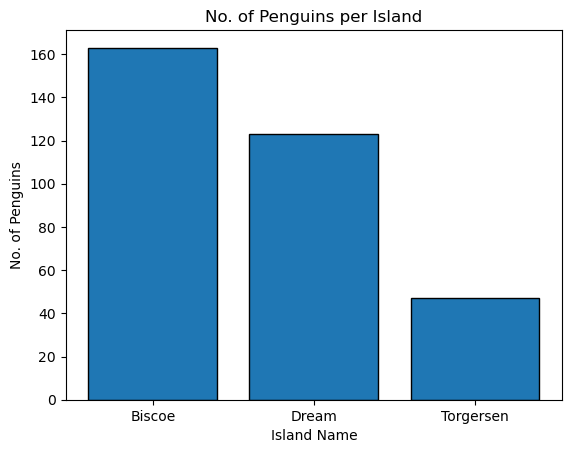

In [27]:
# Plotting a bar chart of the penguin population on each island.

# Set the x-axis to the island names.
xpoints = np.array(["Biscoe", "Dream", "Torgersen"])

# Set the y-axis to the count of each penguin per island.
ypoints = np.array(df['island'].value_counts())

# Plot the bar chart.
plt.bar(xpoints, ypoints, edgecolor = "black")

# Set the labels for the x-axis, y-axis and title of the plot.
plt.xlabel("Island Name")
plt.ylabel("No. of Penguins")
plt.title("No. of Penguins per Island")

# Display the plot
plt.show()

__Investigating the penguin species by island__

It would be nice to get more information about the penguins and to discover what penguin species live on each island. A bar chart could then be plotted to show a breakdown of the penguin count by species on each island.

To do this we need to know:
* the penguin species that are present on each island
* a count of the penguins by species for each island.
  
This can be done in one step using the [groupby function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

In [28]:
# A count of the different penguin species on each island using groupby().
penguin_island = df.groupby('island')['species'].value_counts()
penguin_island

island     species  
Biscoe     Gentoo       119
           Adelie        44
           Chinstrap      0
Dream      Chinstrap     68
           Adelie        55
           Gentoo         0
Torgersen  Adelie        47
           Chinstrap      0
           Gentoo         0
Name: count, dtype: int64

After much trial and error, a [Seaborn countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) appears to be the simplest method of plotting the required information. A countplot is suitable for categorical data (like species or island). Seaborn also has a barplot option which is used for numeric data. 

The hue parameter of certain seaborn plots is very useful as it allows the data to be distiguished by an extra variable.

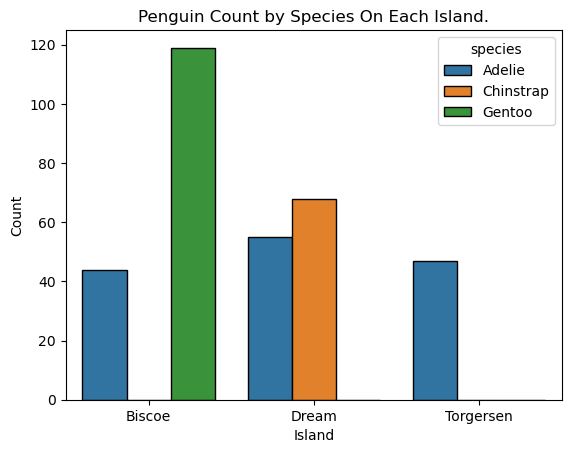

In [29]:
# A breakdown of the penguin population on each island by species.
sns.countplot(df, x = 'island',
            hue = 'species',
            edgecolor = 'black'
            )
plt.title('Penguin Count by Species On Each Island.')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

While the plot displays the number of each penguin species on each island, unfortunately after reviewing the documentation about seaborn countplots, I realised that the above plot is a histogram not a bar chart. 

This [blog](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts#:~:text=Histograms%20and%20bar%20charts%20display,continuous%20(having%20infinite%20values)) helped to clarify the difference between histograms and bar charts. While seaborn has two plot types for histograms depending on the data type, in general histograms are for numeric variables, while bar charts are for categorical variables. One of the defining features of a histogram is that the bars are touching as the data is generally continuous. Bar charts have space between each bars to emphasise the categorical nature of the data. It is also possible for a histogram to have unequal bar widths depending on the bin intervals, which is not possible for a bar chart. 

[Seaborn catplot](https://www.geeksforgeeks.org/python-seaborn-catplot/?ref=lbp)

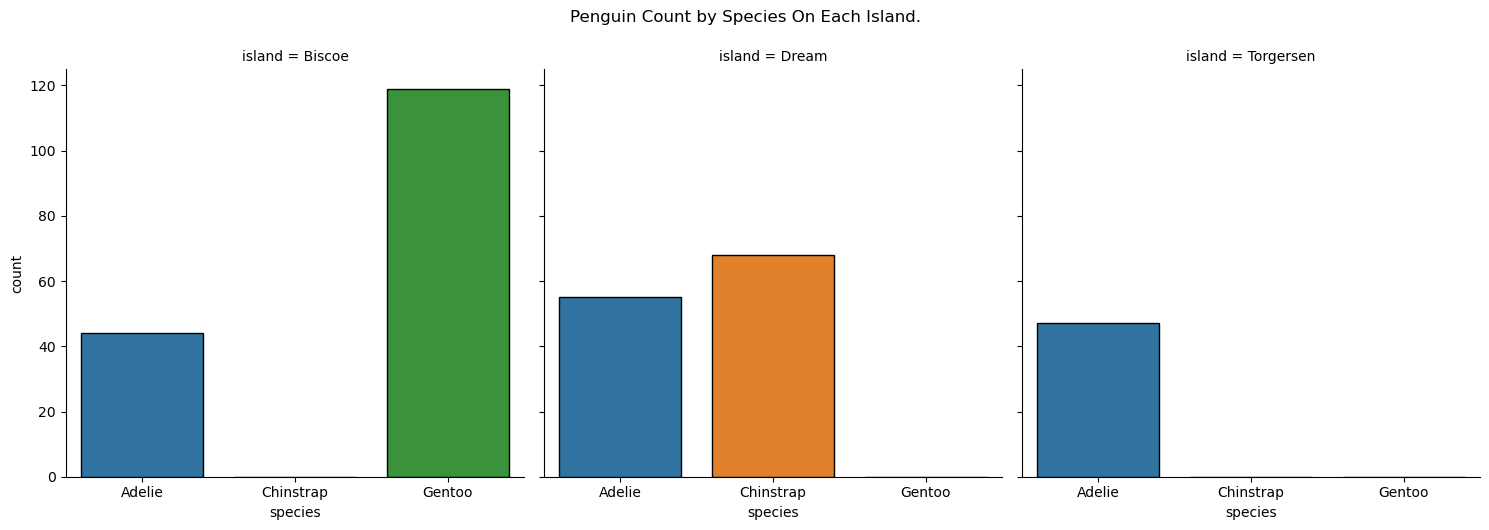

In [30]:
# Bar chart
sns.catplot(data = df, 
            x = 'species', 
            col = 'island', 
            kind = 'count', 
            edgecolor = 'black')
plt.suptitle('Penguin Count by Species On Each Island.', y = 1.05)
plt.show()

__Summary of the penguin population on each island.__

Biscoe is the most populous island with 163 penguins. Torgersen is the least populous island with only 47 penguins of the penguins studied. 

Both Biscoe and Dream have two penguin species present, with only one penguin species present on Torgersen. Adélie penguins were found on all three islands, with Chinstrap and Gentoo found on Dream and Torgersen respectively.

### Histogram of an appropriate variable
***

Task: Create a histogram of an appropriate variable.

A [histogram](https://en.wikipedia.org/wiki/Histogram) visually shows the distribution of values for a numeric variable. The data is divided up in to a range of values, called bins. The number of bins chosen can affect the appearance of the histogram so it is important to choose wisely. There are numerous methods to calculate the [optimal number of bins ](https://medium.com/@maxmarkovvision/optimal-number-of-bins-for-histograms-3d7c48086fde). One of the simplest is the square-root choice, which takes the square root of the number of data points and rounds it to the nearest whole number. Ten is the default number of bins for a matplotlib histogram. 

![Appearance of histogram](https://upload.wikimedia.org/wikipedia/commons/8/81/Untitled_document_%281%29.jpg)


_Image credit JHK111, CC0, via Wikimedia Commons_

Any of the four numerical variables in the data set, bill length, bill depth, flippper length and body mass could be plotted as a histogram as they are continuous numeric data. 

The chosen variable is flipper length.

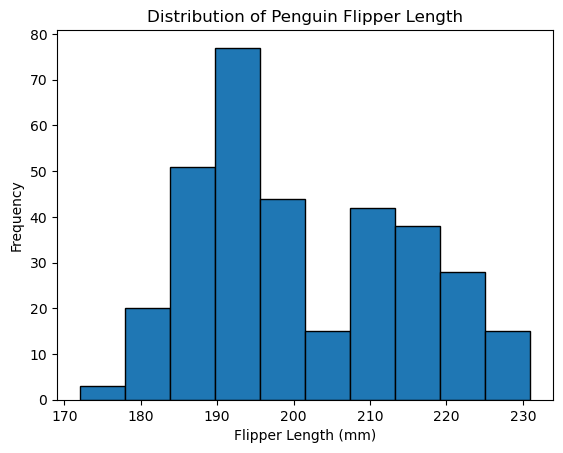

In [31]:
# Plot of the distribution of flipper length (mm)
plt.hist(df["flipper_length_mm"], edgecolor = 'black')

# Set the title and labels of the x and y axis.
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Frequency")
plt.title("Distribution of Penguin Flipper Length")

plt.show()

The histogram with a [normal distribution](https://www.scribbr.com/statistics/normal-distribution/) should have a symmetrical bell shape with the mean, meadian and mode all equal at the highest point of the plot. 


![Normal Distribution](https://www.mathsisfun.com/data/images/normal-distribution-2.svg)

_Image credit mathisfun.com_


The histogram of flipper lengths is unusual and further analysis is required to explain the shape of the histogram. As there are three penguin species, the flipper length for each species will be analysed to see an explanation can be found for the unusual shape of the histogram.

In [32]:
# Calculating the mean, standard deviation and median of the flipper length for the different penguin species.
df.groupby("species")["flipper_length_mm"].agg([np.mean, np.std, np.median, min, max])

,mean,std,median,min,max
species,,,,,
Adelie,190.102740,6.521825,190.0,172,210
Chinstrap,195.823529,7.131894,196.0,178,212
Gentoo,217.235294,6.585431,216.0,203,231


The above table demonstrates that each of the penguin species have noticeably different flipper lengths characteristics. The Gentoo penguins have the largest flippers with the average flipper length of 217mm and a median value of 216mm. The Adelie penguins have the smallest flipper length of 189mm with a median of 190mm.

The bars on the right of the above histogram from approximately 208mm is the distribution of flipper lengths for the Gentoo penguin. The bars on the left are for the overlapping values of the Adelie and Chinstrap penguins.

An improved histogram is required to show the distribution of flipper lengths for the penguin species.

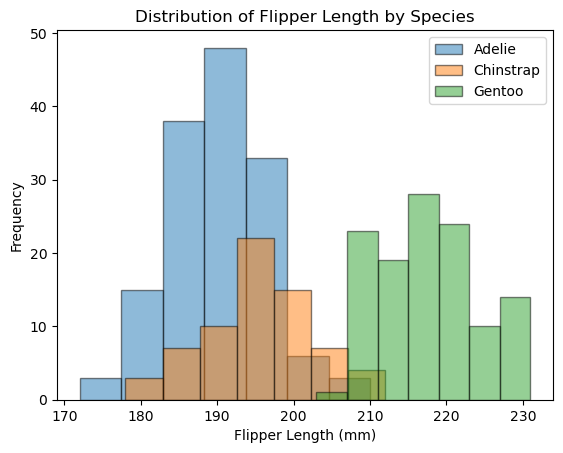

In [33]:
# Histogram of the variations in flipper length by species.

fig, ax = plt.subplots()

ax.hist(adelie['flipper_length_mm'], label = "Adelie", edgecolor = "black", alpha = 0.5, bins = 7)
ax.hist(chinstrap['flipper_length_mm'], label = "Chinstrap", edgecolor = "black", alpha = 0.5, bins = 7)
ax.hist(gentoo['flipper_length_mm'], label = "Gentoo", edgecolor = "black", alpha = 0.5, bins = 7)


# Set the title and labels of the x and y axis.
ax.set_title("Distribution of Flipper Length by Species")
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Frequency")

# Display the legend
ax.legend()
plt.show()

This histogram clearly demonstrates that each species has their own discrete range flipper length values and the histogram for each species resembles the expected a normal distribution.

It could be possible from flipper lengths to identify a penguin as a Gentoo penguin. It would be more difficult to classify the Adelie and the Chinstrap penguins by their flipper lengths alone as the values overlap.

## Project
***

Select two variables from the data set and provide an analysis of how correlated they are.

### What is Correlation?

[Correlation](https://www.jmp.com/en_ca/statistics-knowledge-portal/what-is-correlation.html) tells us how two variables are related. 

Before the correlation coefficient is calculated it is good practice to plot a scatter plot of the variables of interest. This article by [atlassian.com](https://www.atlassian.com/data/charts/what-is-a-scatter-plot) gives a good summary of the importance of scatter plots and some of the common issues associated with them. It states that scatter plots identify possible relationships between two different numeric variables and is a visual check to see if there is a linear or non-linear relationship between the variables. Scatter plots will also indicate if there are any outlying points (outliers) away from the main data points that could disrupt accurate correlation.


![Scatter plots](https://media.geeksforgeeks.org/wp-content/uploads/python-linear-regression-4.png)

_Credit geeksforgeeks.com_

The first plot demonstrates a linear relationship between the variables. The second and third plot show two plots with non-linear relationships wiht a clear correlation between the variables. However, the most commonly used correlation coefficient, the Pearson method correlation coefficient is not suitable for plots two and three as they do not have a linear relationship. The second plot depicts an exponential relationship. If a log transformation of this data was performed, the data could be linearized and then the correlation coefficient calculated as shown in this [datacamp lesson](https://campus.datacamp.com/courses/introduction-to-statistics-in-python/correlation-and-experimental-design-4?ex=4).


Pandas has a [corr() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) to calculate the correlation coefficient. The default method is the Pearson method correlation. The values of the correlation coefficient are always in the range of -1 to +1. The sign indicates the direction of the relationship, with -1 indicating a strong negative correlation (as x increases, y decreases), 0 indicates no correlation and +1 is a strong positive correlation (as x increases, y increases). It is worth noting that in some cases a correlation coefficient of 0.6 is considered a strong correlation depending on the variables involved. This [article by Jim Frost](https://statisticsbyjim.com/basics/correlations/) states that in studies analysing human behaviour this could apply as human behaviour is notoriously unpredictable. 

![Scatter plot and Correlation](https://files.realpython.com/media/py-corr-1.d13ed60a9b91.png)

_Credit realpython.com_

A common pitfall is to relate the slope of the trendline (also called the regression line or line of best fit) with the value of the correlation coefficient. As it states in [this blog](https://www.scribbr.com/frequently-asked-questions/is-the-correlation-coefficient-the-same-as-the-slope-of-the-line/#:~:text=No%2C%20the%20steepness%20or%20slope,can%20have%20very%20different%20slopes.) two data sets could have the same correlation coefficient but have very different slopes. It is the spread of the data around the trendline that is relevant to the correlation coefficient. The direction of the slope does relate to the positive or negative sign of the correlation coefficient. 


__When choosing what variables to use for predictive modelling and machine learning it is important to understand how the variables interact together to decide on what features are important for whatever model is used. Predictive modelling could be used to predict the sex of the penguins based on the other variables in the data set. Machine learning is ADD MORE__

### Scatter plot and regression line.

There are a couple of different methods to generate a scatter plot. Matplotlib's [plt.scatter()](https://www.w3schools.com/python/python_ml_scatterplot.asp) is one method and seaborn's [sns.scatterplot()](https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/) is another.

Seaborn has [lmplot and regplot](https://seaborn.pydata.org/tutorial/regression.html) to create a scatter plot with an overlaid regression line and is very useful to check for a linear relationship. lmplot and regplot are very similar but regplot is an axes level function and lmplot is a figure level function. lmplot also has additional the very useful additional parameter of hue. Hue will colour the data points based on a third variable.

The regression line can also be calculated using numpy and this will be demonstrated to give an understanding as to the calculations that underpin __BLAH BLAH_

My chosen variables are flipper length and body mass.

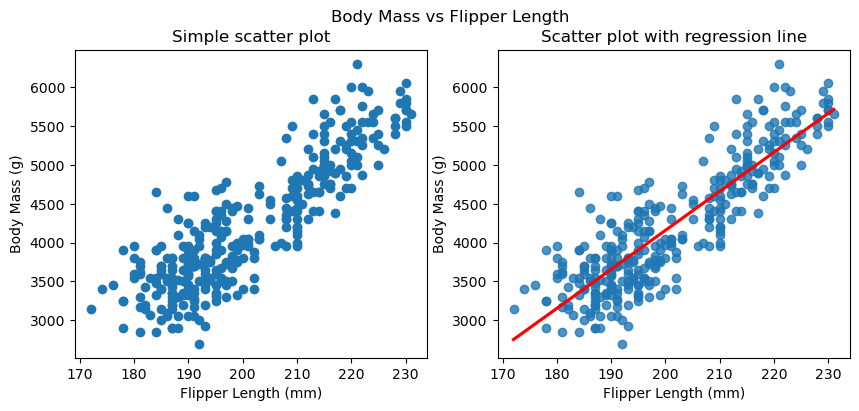

In [34]:
# Simple scatter plot to get started of body mass (g) vs flipper length (mm) and also a scatter plot with a regression line using regplot.
# Using regplot as this plot has axes.

fig, axs = plt.subplots(1,2, figsize = (10,4))

axs[0].scatter(df['flipper_length_mm'], df['body_mass_g'])
sns.regplot(x = 'flipper_length_mm', 
            y = 'body_mass_g', 
            data = df, 
            ci = None, 
            line_kws= {'color':'red'}, 
            ax = axs[1])

# Add title, x and y labels to the plot.
plt.suptitle('Body Mass vs Flipper Length')
axs[0].set_title('Simple scatter plot')
axs[1].set_title('Scatter plot with regression line')

# Set x- axis labels
axs[0].set_xlabel('Flipper Length (mm)')
axs[1].set_xlabel('Flipper Length (mm)')

# Set y- axis labels
axs[0].set_ylabel('Body Mass (g)')
axs[1].set_ylabel('Body Mass (g)')

# Display the plot
plt.show()

In [68]:
# Plotting the data with a line of best fit using numpy.

# First convert the values in the flipper length and the body mass columns into a numpy array.
flipper_array = df['flipper_length_mm'].to_numpy()

mass_array = df['body_mass_g'].to_numpy()


__EXPLain__

$ y = mx + c $

In [69]:
# Use numpy polyfit to fit a straight line between x and y.
m, c = np.polyfit(flipper_array, mass_array, 1)
m, c

(50.15326594224113, -5872.0926828428255)

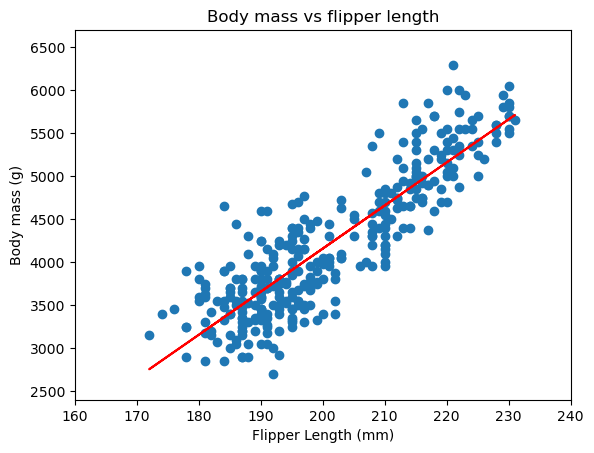

In [73]:
fig, ax = plt.subplots()

# A scatter plot of body mass vs flipper length using the numpy array generated in cell 68.
ax.scatter(flipper_array, mass_array)

# Plotting the trend line. Using the y axis values are generated from the equation of the line, with m and c equal to the values in cell 69.
ax.plot(flipper_array, m * flipper_array + c, 'r-')

# Axis labels.
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body mass (g)')

# Title.
plt.title('Body mass vs flipper length')

# X limits
ax.set_xlim(160, 240)

#Y limits
ax.set_ylim(2400, 6700)

plt.show()

As there is a linear relationship between the chosen variables, the correlation coefficient between body mass and flipper length can be calculated.

In [35]:
# Correlation between body mass and flipper length.
penguins_corr_fl_bm = df['body_mass_g'].corr(df['flipper_length_mm'])

print(f'The correlation coefficient between flipper length and body mass is: {penguins_corr_fl_bm.round(3)}.')

The correlation coefficient between flipper length and body mass is: 0.873.


In [66]:
np.corrcoef(flen, bmass)

array([[1.       , 0.8729789],
       [0.8729789, 1.       ]])

A correlation coefficient of 0.873 indicates a strong positive correlation between body mass and flipper length, as flipper length increases, body mass will increase. 

It is important to note that correlation does not mean causation. This means that if x and y are correlated, x does not necessarily cause y. There could be other variables, called [confounding variables](https://www.sciencedirect.com/topics/nursing-and-health-professions/confounding-variable) involved which are related to the variables of interest which could lead to misleading results. 

It is worth investigating if the correlation coefficient between flipper length and body mass is varies for the different penguin species.

__Scatter plot by species__

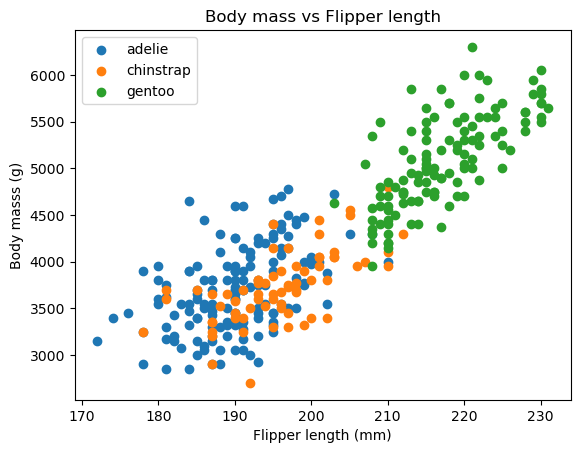

In [36]:
# Scatter plot of body mass (g) vs flipper length (mm) by species.
fig, ax = plt.subplots()

ax.scatter(adelie['flipper_length_mm'], adelie['body_mass_g'], label = 'adelie')
ax.scatter(chinstrap['flipper_length_mm'], chinstrap['body_mass_g'], label = 'chinstrap')
ax.scatter(gentoo['flipper_length_mm'], gentoo['body_mass_g'], label = 'gentoo')

# Set the x-axis, y-axis and title labels.
ax.set_xlabel('Flipper length (mm)')
ax.set_ylabel('Body masss (g)')
ax.set_title('Body mass vs Flipper length')

ax.legend()
plt.show()

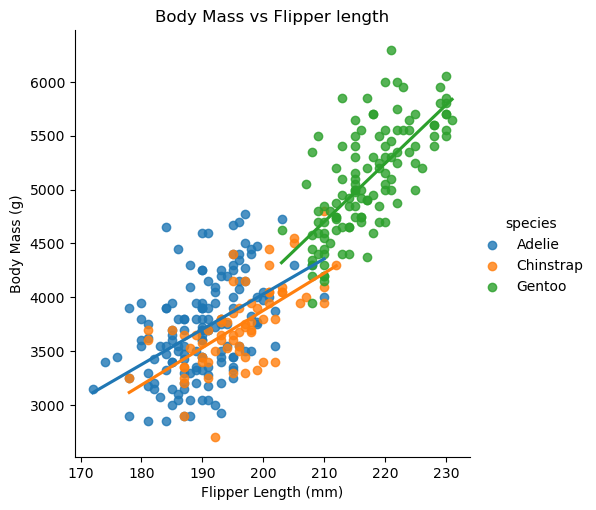

In [37]:
# Demonstrating the use of seaborn lmplot.
# It plots the same scatter plot as above with an overlaid trend line.
# Notice with seaborn only one line of code for the actual plot compared with 3 lines of code for the matplotlib in the above plot.
# The seaborn hue parameter is very useful to display a third variable.

sns.lmplot(x = 'flipper_length_mm', 
           y = 'body_mass_g', 
           data = df, 
           ci = None, 
           hue = 'species')

# Adding title, x and y labels to the plot.
plt.title('Body Mass vs Flipper length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Display the plot
plt.show()

The scatter plot indicates that for body mass vs flipper length the Gentoo penguins are a distinct cluster compared with the overlapping cluster of the Chinstrap and Adélie penguins. The overlapping cluster of the Chinstrap and Adélie penguins would make developing a model that could predict if the penguin was either a Chinstrap penguin or an Adélie penguin based on flipper length and body mass difficult. It could be possible to develop a model that could predict if the penguin was a Gentoo penguin as it is a distinct cluster. 

There are many examples of scatter plots of flipper length vs body mass that are similiar to the ones plotted in this analysis. Some of these are [Palmer Penguins by Allison Horst](https://allisonhorst.github.io/palmerpenguins/index.html), [Exploratory data analysis on Palmer Archipelago (Antartica) Penguin Data](https://allysonf.medium.com/exploratory-data-analysis-on-palmer-archipelago-antarctica-penguin-data-41ff3e6efeda) and [Palmer Penguins: Body Mass vs Flipper Length](https://www.kaggle.com/code/reycarloytariga/palmer-penguins-body-mass-vs-flipper-length). 



__Calculating the correlation between body mass and flipper length by species.__



In [38]:
# Correlation between body mass and flipper length for Adélie penguins.
adelie_corr_fl_bm = adelie['body_mass_g'].corr(adelie['flipper_length_mm'])

print(f'The correlation coefficient between body mass and flipper length for the Adélie penguins is: {adelie_corr_fl_bm.round(3)}.')

The correlation coefficient between body mass and flipper length for the Adélie penguins is: 0.465.


In [39]:
# Correlation between flipper length and body mass for Chinstrap penguins.
chinstrap_corr_fl_bm = chinstrap['body_mass_g'].corr(chinstrap['flipper_length_mm'])

print(f'The correlation coefficient between body mass and flipper length for the Chinstrap penguins is: {chinstrap_corr_fl_bm.round(3)}.')

The correlation coefficient between body mass and flipper length for the Chinstrap penguins is: 0.642.


In [40]:
# Correlation between flipper length and body mass for Gentoo penguins.
gentoo_corr_fl_bm = gentoo['body_mass_g'].corr(gentoo['flipper_length_mm'])

print(f'The correlation coefficient between body mass and flipper length for the Gentoo penguins is: {gentoo_corr_fl_bm.round(3)}.')

The correlation coefficient between body mass and flipper length for the Gentoo penguins is: 0.711.


In [41]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

The correlation coefficients for flipper length and body mass for the individual penguin species are lower than the value calculated for the overall group of penguins. The correlation coefficient for Gentoo penguins is moderately strong at 0.71. There appears to be quite a lot of outliers for the Chinstrap penguins that is affecting the correlation coefficient. It is worth nothing that there are only 68 Chinstrap penguins in the data set. Perhaps a larger sample of Chinstrap penguins would yield a different result. 

|Species|Corrrelation Coefficient|
|---|:---:|
|Overall |0.873|
|Adélie|0.465|
|Chinstrap|0.642|
|Gentoo|0.711|

As the penguins are also categorised by sex, I will do one more plot of body mass vs flipper length categorised by species and sex to see if it will yield any additional insights into the data set.

__Scatter plot of body mass vs flipper length by species and sex.__

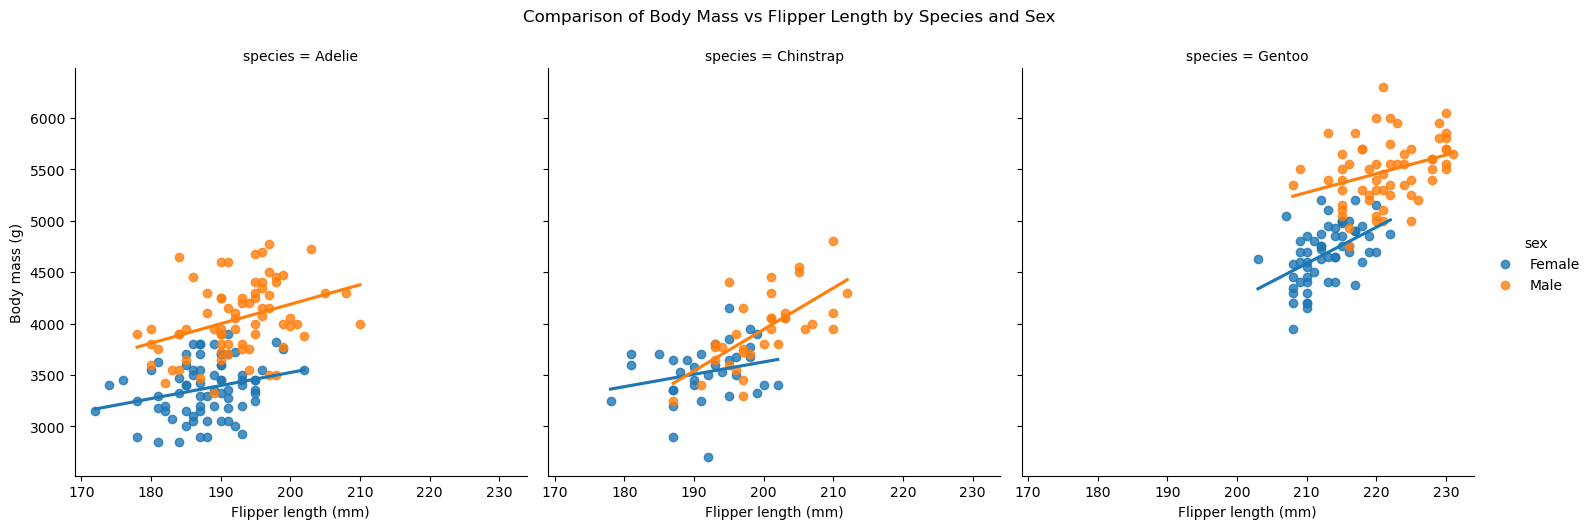

In [42]:
g = sns.lmplot(x = 'flipper_length_mm', y = 'body_mass_g', col = 'species', hue = 'sex', data = df, ci = None)
g.fig.suptitle('Comparison of Body Mass vs Flipper Length by Species and Sex', y = 1.05)
g.set(xlabel = 'Flipper length (mm)', ylabel = 'Body mass (g)')
plt.show()

The first new insight is that males penguins are in general heavier than female penguins. A seaborn histogram should confirm this.

Secondly we can see that the heavier male Gentoo and Chinstrap penguins appear to have longer flipper lengths but this effect isn't as obvious for male Adélie penguins. There are some heavier Adélie penguins with longer flipper lengths but not as many as for Gentoo and Chinstrap penguins.

For completeness sake, I will calculate new correlation coefficients based on sex. However, the spread of the data around the regression line would indicate that there isn't a strong correlation between flipper length and body mass by the sex and species of the penguin. The male Chinstrap penguins will probably have the largest correlation coefficient but with such a small sample size it is hard to predict what relevance this value would have to the overall population of male Chinstrap penguins.

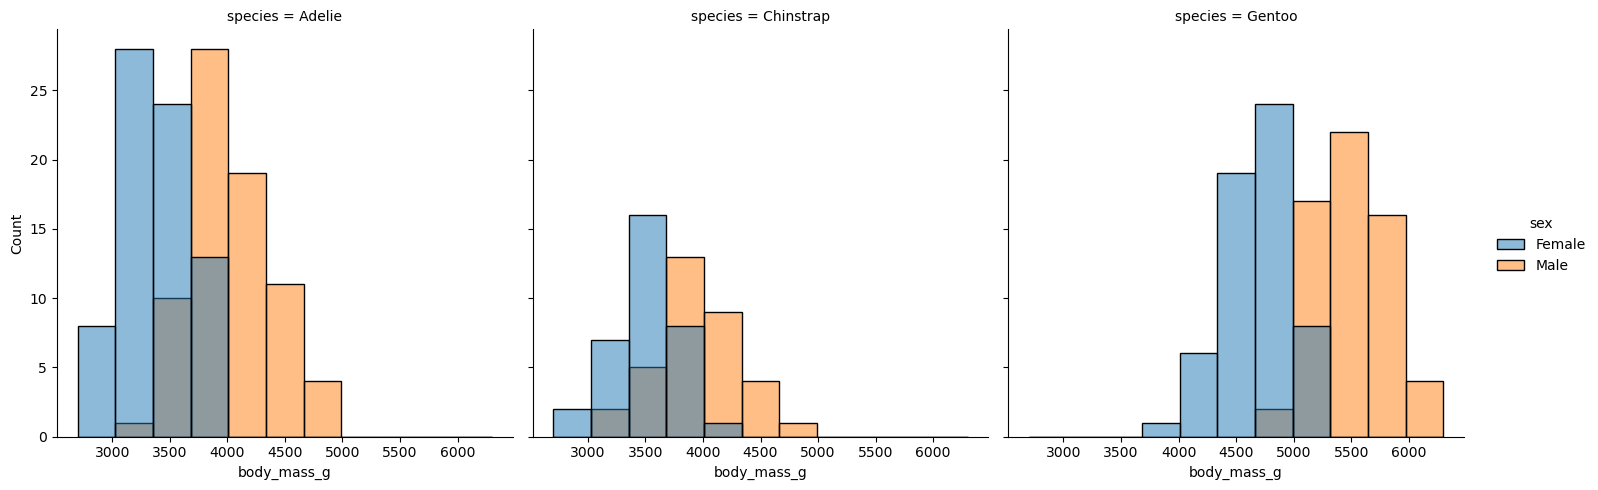

In [43]:
# Histogram using seaborn displot to confirm that male penguins are in general heavier than female penguins.
sns.displot(data = df, x = 'body_mass_g', hue = 'sex', col = 'species')
plt.show()

In [44]:
df.groupby(['species', 'sex'])[['body_mass_g', 'flipper_length_mm']].agg([np.mean, np.std, np.median, min, max])

body_mass_g                                  \
                         mean         std  median   min   max   
species   sex                                                   
Adelie    Female  3368.835616  269.380102  3400.0  2850  3900   
          Male    4043.493151  346.811553  4000.0  3325  4775   
Chinstrap Female  3527.205882  285.333912  3550.0  2700  4150   
          Male    3938.970588  362.137550  3950.0  3250  4800   
Gentoo    Female  4679.741379  281.578294  4700.0  3950  5200   
          Male    5484.836066  313.158596  5500.0  4750  6300   

                 flipper_length_mm                             
                              mean       std median  min  max  
species   sex                                                  
Adelie    Female        187.794521  5.595035  188.0  172  202  
          Male          192.410959  6.599317  193.0  178  210  
Chinstrap Female        191.735294  5.754096  192.0  178  202  
          Male          199.911765  5.976558  200.5  187  212  
Gentoo    Female        212.706897  3.897856  212.0  203  222  
          Male          221.540984  5.673252  221.0  208  231

To calculate the correlation coefficient based on the sex and species of the penguins, dataframes by sex were created for each penguin species. 

In [45]:
# Creating male and female dataframes for each species.

# For adelie penguins.
male_adelie = adelie[adelie['sex'].str.contains('Male')]
female_adelie = adelie[adelie['sex'].str.contains('Female')]

# For chinstrap penguins.
male_chinstrap = chinstrap[chinstrap['sex'].str.contains('Male')]
female_chinstrap = chinstrap[chinstrap['sex'].str.contains('Female')]

# For gentoo penguins.
male_gentoo = gentoo[gentoo['sex'].str.contains('Male')]
female_gentoo = gentoo[gentoo['sex'].str.contains('Female')]

In [46]:
# Correlation coefficient for male and female Adélie penguins
male_corr_adelie = male_adelie['body_mass_g'].corr(male_adelie['flipper_length_mm']).round(3)
female_corr_adelie = female_adelie['body_mass_g'].corr(female_adelie['flipper_length_mm']).round(3)

print(f'The correlation coefficient of flipper length vs body mass for male Adélie penguins is {male_corr_adelie}')
print(f'The correlation coefficient of flipper length vs body mass for female Adélie penguins is {female_corr_adelie}')

The correlation coefficient of flipper length vs body mass for male Adélie penguins is 0.36
The correlation coefficient of flipper length vs body mass for female Adélie penguins is 0.263


In [47]:
# Correlation coefficient for male and female Chinstrap penguins
male_corr_chinstrap = male_chinstrap['body_mass_g'].corr(male_chinstrap['flipper_length_mm']).round(3)
female_corr_chinstrap = female_chinstrap['body_mass_g'].corr(female_chinstrap['flipper_length_mm']).round(3)

print(f'The correlation coefficient of flipper length vs body mass for male Chinstrap penguins is {male_corr_chinstrap}')
print(f'The correlation coefficient of flipper length vs body mass for female Chinstrap penguins is {female_corr_chinstrap}')

The correlation coefficient of flipper length vs body mass for male Chinstrap penguins is 0.665
The correlation coefficient of flipper length vs body mass for female Chinstrap penguins is 0.242


In [48]:
# Correlation coefficient for male and female Chinstrap penguins
male_corr_gentoo = male_gentoo['body_mass_g'].corr(male_gentoo['flipper_length_mm']).round(3)
female_corr_gentoo = female_gentoo['body_mass_g'].corr(female_gentoo['flipper_length_mm']).round(3)

print(f'The correlation coefficient of flipper length vs body mass for male Gentoo penguins is {male_corr_gentoo}')
print(f'The correlation coefficient of flipper length vs body mass for female Gentoo penguins is {female_corr_gentoo}')

The correlation coefficient of flipper length vs body mass for male Gentoo penguins is 0.33
The correlation coefficient of flipper length vs body mass for female Gentoo penguins is 0.488


__Discussion of the Correlation Results__

The table below summarises the values of the correlation coefficients. 

|Species|Sex|Corrrelation Coefficient|
|:---:|:---:|:---:|
|Overall ||0.873|
|Adélie||0.465|
||Male|0.360|
||Female|0.263|
|Chinstrap||0.642|
||Male|0.665|
||Female|0.242|
|Gentoo||0.711|
||Male|0.330|
||Female|0.488|


Overall there is a strong positive correlation between flipper length and body mass with a correlation coefficient of 0.873.

Each penguin species has a unique correlation coefficient. The correlation coefficient between flipper length and body mass for the each species is lower than the overall value obtained. Adélie penguins have a moderate correlation with a value of 0.47 and the Gentoo penguins have a stronger correlation coefficient of 0.70. For Chinstrap penguins the value of the correlation coefficient was 0.64. 

If a data analyst was not concerned with either the species or sex of the penguin they could develop a predictive model to predict either the flipper length based on body mass or vice versa. The data analyst would need to be aware of the following statement by [Gormam et al.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081#s4) "we recognize that our body mass results are truly only relevant for individuals during the egg laying period and should not be considered representative of individuals during other seasonal phases such as chick rearing or outside the breeding season". Each penguin was captured after they had laid one egg, their measurements were taken and they were then monitored until they had laid two eggs. The data analyst could develop a predictive model but if they were to apply it to another data set with body mass information they would need to know the seasonal stage of the penguin when the data was collected. This [article](https://onlinelibrary.wiley.com/doi/full/10.1002/ece3.5067) published by Emmerson et al. in the journal, Evolution and Ecology discusses the variations in body mass throughout the course of a year in a group of Adélie and Gentoo penguins. The body mass of the penguins studied was at the highest just prior to egg laying and molting (when they shed their feathers).

The correlation coefficient values obtained in this analysis are similiar to the values obtained by [Allison Horst](https://allisonhorst.github.io/palmerpenguins/articles/pca.html#pairwise-plot-matrix) in her original analysis and in this [rpubs article](https://rpubs.com/friendly/penguin-biplots). 

While calculating the correlation coefficient for each species was not unusual, calculating a correlation coefficient for male and female penguins for each penguin species appears to be an original analysis. In a search of the literature the only calculation for correlation I could find that took the sex of the penguin into account was this article on [medium.com by Jingyi Fang](https://allysonf.medium.com/exploratory-data-analysis-on-palmer-archipelago-antarctica-penguin-data-41ff3e6efeda). They did not take the species of the penguin into account and obtained correlation coefficients for male and female penguins of 0.863 and 0.872 respectively. 

![Flipper length vs body mass for two sexes](https://miro.medium.com/v2/resize:fit:750/format:webp/1*tRaWpTEdXSl8k_eFseZStw.png)

_Plot from medium.com by Jingyi Fang_





Adélie penguin body mass and culmen length were the strongest predictors of sex,

while body mass and culmen depth were best predictors of male and female gentoo penguins. 

For chinstrap penguins, body mass was the least predictive structural feature, while culmen length and depth were similarly strong predictors of sex. Species-specific models based on these best morphological predictors correctly classified a high percentage of individuals from independent datasets (i.e., 89–94%). 

Interestingly, flipper length was not a strong predictor of sex for any of the three species.

Culmen features and body mass are structures important during penguin courtship [52], and therefore, likely targets of sexual selection, which may be why these parameters are strong predictors of sex across Pygoscelis species. Similar results were found by Bertellotti et al. [61] who included bill depth and length, but not flipper length, of Magellanic penguins (Spheniscus magellanicus) in a discriminant function that correctly classified 97% of adults.


### Additional References

[Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)


__Pandas and Exploratory Data Analysis__

Datacamp [Data Manipulation with Pandas](https://app.datacamp.com/learn/courses/data-manipulation-with-pandas)

[Penguins Dataset Overview - Iris alternative](https://towardsdatascience.com/penguins-dataset-overview-iris-alternative-9453bb8c8d95)

[Exploratory Data Analysis Palner Penguins](https://deepnote.com/app/mazzaroli/Exploratory-Data-Analysis-to-Predictive-analysis-Palmer-Penguins-e6bd8932-9ca1-4363-b78a-79f4f4dc818f) 



__Images in markdown__

To insert images in markdown the following is used: 
```
![Text](link to image)
```

 However, it is difficult to resize images in markdown as it has no sizing parameters so inserting the image using html can sometimes be preferable. [w3schools](https://www.w3schools.com/html/html_images.asp) has a straight forward lesson on how to insert images using html. 

```html
<img src="image.png" alt="image" style = "width:600px; height=auto">
```

__Calculating Correlation Coefficients__

[Common pitfalls in statistical analysis: The use of correlation techniques](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079093/)

[How to calculate correlation between two columns in Pandas](]https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/)


__Plotting__

Datacamp [Introduction to Data Visualization with Matplotlib](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-matplotlib)

Datacamp [Introduction to Data Visualization with Seaborn](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-seaborn)

Countplot using seaborn in python https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/?ref=ml_lbp

Seaborn catplot https://www.geeksforgeeks.org/python-seaborn-catplot/?ref=lbp


__Machine Learning__

[Predicting the sex of penguins using machine learning](https://www.youtube.com/watch?v=euGEsJj-oI4)

[EDA and K-means model with python](https://www.kaggle.com/code/theerachodsepdham/eda-k-means-model-with-python?scriptVersionId=169589012)  build a machine learning model for predicting penguin species. 

[Classify Palmer Penguins using machine learning](https://www.neuraldesigner.com/learning/examples/palmer-penguins/)

## End

***